<a href="https://colab.research.google.com/github/Rohit-Singh1/Image-Processing-and-Deep-Learning/blob/main/Data_Loaders_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Here the goal is to perform data loading using PyTorch so that we can easily access data and perform deep laerning operations.

---

source : https://www.pyimagesearch.com/2021/10/04/image-data-loaders-in-pytorch/

In [130]:
!pip install torchvision

IMAGE FROM FOLDER.

---


The FOlder Structure must be like this
 


1.   root/class_name_1/img_id.png
2.   root/class_name_2/img_id.png
3. root/class_name_3/img_id.png
4. root/class_name_4/img_id.png


In [131]:

INPUT_HEIGHT=128
INPUT_WIDTH=128

# Batch size and validation data set split
BATCH_SIZE = 8
VAL_SPLIT = 0.1

In [132]:
#  /content/daisy.png/

from torchvision.datasets import ImageFolder
# ImageFoler : Responsible for loading data from "train" and \
# "val" folders into pytorch

In [133]:
from torch.utils.data import DataLoader

    # Enables to wrap iterable around datasets 
    # so that it canbe easily accessed


In [134]:
from torchvision import transforms

# Provides common image tranformations

In [135]:
import torch
import matplotlib.pyplot as plt


In [136]:
# batch is tuple where 0th index contain image and 1th index contain id
# classes is different datasets category
def visualize(batch,classes):
  fig = plt.figure(figsize=(BATCH_SIZE,BATCH_SIZE))
  a,b = BATCH_SIZE//4,4
  for i in range(BATCH_SIZE):
    ax = plt.subplot(a,b,i+1)

    image = batch[0][i].cpu().numpy()
    image = image.transpose((1,2,0))
    image = (image*255.0).astype('uint8')

    id = batch[1][i]
    label = classes[id]

    plt.imshow(image)
    plt.title(label)
    plt.axis("off")
  
  plt.tight_layout()
  plt.show()

In [137]:
# Data Augmentation
resize = transforms.Resize(size=(INPUT_HEIGHT,INPUT_WIDTH))
hFlip = transforms.RandomHorizontalFlip(p=0.25)   # p is the probabilty that image is flipped
vFlip = transforms.RandomVerticalFlip(p=0.25)
rotate = transforms.RandomRotation(degrees=15)

In [138]:
trainTransforms = transforms.Compose([resize,hFlip,vFlip,rotate,transforms.ToTensor()])
valTransforms = transforms.Compose([resize,transforms.ToTensor()])
# To.Tensor() transform here which simply converts all input images to 
# PyTorch tensors. In addition, this transform also converts the input PIL Image or numpy.ndarray
# which are originally in the range from [0, 255]
# , to [0, 1]


In [139]:
trainDataset = ImageFolder(root="/content/dataset",transform=trainTransforms)

In [140]:
trainDataset

Dataset ImageFolder
    Number of datapoints: 10
    Root location: /content/dataset
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.25)
               RandomVerticalFlip(p=0.25)
               RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
           )

Generate iterator over dataset , which picks data in batch of BATCH_SIZE

In [141]:
trainDataLoader = DataLoader(dataset=trainDataset,batch_size=BATCH_SIZE,
                             shuffle=True)

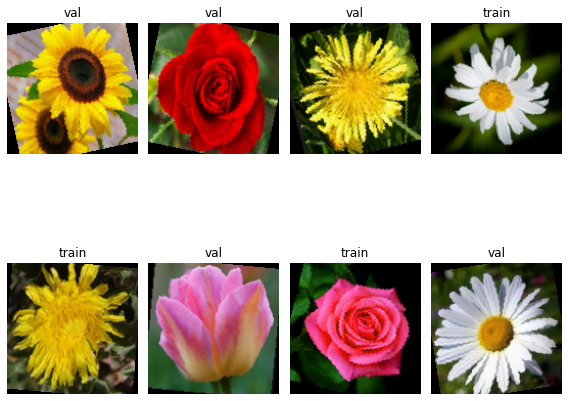

In [143]:
# grab a batch from both training and validation dataloader
trainBatch = next(iter(trainDataLoader))
# visualize the training and validation set batches
visualize(trainBatch, trainDataset.classes)

IMAGE PROCESSING DIRECTLY FROM PYTorch API

In [144]:
from torchvision.datasets import MNIST

In [145]:
def visualize_batch(batch,classes,dataset_type):
  fig = plt.figure(figsize=(BATCH_SIZE,BATCH_SIZE))

  for i in range(0,BATCH_SIZE):
    #create a subplot
    ax = plt.subplot(2,4,i+1)

    # Transform image to conventional image pixel range [0,255]
    image = batch[0][i].cpu().numpy()
    image = image.transpose((1,2,0))
    image = (image*255).astype('uint8')

    idx = batch[1][i]
    label = classes[idx]

    plt.imshow(image[...,0],cmap="gray")
    plt.title(label)
    plt.axis("off")
  
  plt.tight_layout()
  plt.show()

In [146]:
# define the transform
transform = transforms.Compose([transforms.ToTensor()])
# initialzie the training and validation dataset

# loading the training and validation dataset

#root = "mnist" for MNIST set (PREDEFINED, FIXED)
trainDataset = MNIST(root="mnist", train=True,
	download=True, transform=transform)
valDataset = MNIST(root="mnist", train=False,   #train = False means we want to load test test
	download=True, transform=transform)

DataLoader returns Generator which can be used to iterate over the samples

In [147]:
trainDataLoader = DataLoader(dataset=trainDataset,batch_size=BATCH_SIZE,
                             shuffle=True)

valDataLoader = DataLoader(dataset=valDataset,batch_size=BATCH_SIZE,shuffle=True)

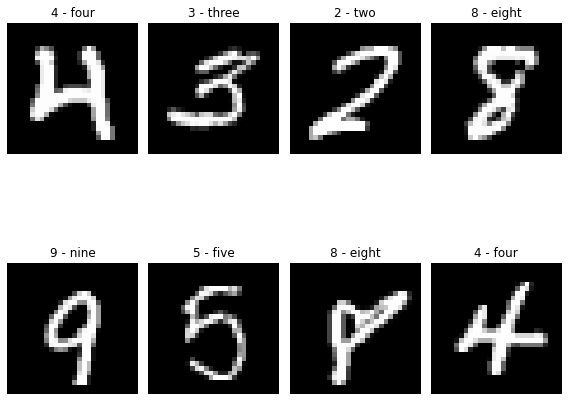

In [148]:
# grab a batch from both training and validation dataloader
trainBatch = next(iter(trainDataLoader))
valBatch = next(iter(valDataLoader))
# visualize the training and validation set batches
visualize_batch(trainBatch, trainDataset.classes, "train")